In [74]:
import re
import os
import gzip
import time
import matplotlib.pyplot as plt
directory = "Practice_02_data/"


In [75]:
#### Cell of all my function

def list_file_data(nom_directory):
    myListFile = []
    for f in os.listdir(nom_directory):
        if os.path.isdir(f): # si f est un dossier
            os.chdir(f) # On va lister son contenu
            parse()
            os.chdir('../') # On revient au répertoire précédent
        else:
            myListFile.append(f)
        # Traitement sur le fichier f
    return myListFile


def preprocesDataFile(fileName):
    input_file = gzip.open(fileName, 'rb')
    full_text = input_file.read()
    docListNum = re.findall('<doc><docno>(.*?)</docno>(.*?)</doc>', str(full_text).strip())
    list_doc = re.findall('<doc><docno>(.*?)</docno>', str(full_text).strip())
    return docListNum, list_doc

def countWord(words):   
    word_count = {} # compte l'occurance d'un terme dans tous les documents
    for word in words: # On nparcours la listes de mots*
        word  = word.lower()
        if not word in word_count:
            word_count[word] = 1
        else:
            word_count[word] = word_count[word] + 1
    return word_count

def countWordIntoDocs(dico, docno, posting):
    docname = str("doc_"+docno)
    
    for word, frequence in dico.items():
        posting.setdefault(word,[]).append((docname,frequence)) ### Remplace les lignes de commande suivante:
        """
        if not word in list(posting.keys()):
            posting[word] = [(docname, frequence)]
        else:
            posting[word].append((docname, frequence))
        """
    return posting



In [76]:
### Cell to initialise variable
list_data = list_file_data(directory)
posting_list = {}
posting_list_global = {}
file_indexing_infos = {}
x_axis = list()
y_time = list()

In [77]:
for index in range(len(list_data)):
    start = time.time()
    
    fileName = str(directory+list_data[index]) 
    docListNum, list_doc = preprocesDataFile(fileName)
    size = os.path.getsize(fileName)
    
    for i in range(len(list_doc)):
        list_terms = docListNum[i][1].replace('\\n', '').split()
        current_dico = countWord(list_terms)
        posting_list = countWordIntoDocs(current_dico, list_doc[i], posting_list)
    
    file_number = fileName.replace('Practice_02_data/','').split('-',1)
    vocub_size = 0
    for k,v in posting_list.items():
        vocub_size+=len(posting_list[k])
    end = time.time()
    elapsed = end - start
    file_indexing_infos[file_number[0]]=(round(elapsed,3), vocub_size)
    

In [78]:
file_indexing_infos

{'01': (0.3, 8658),
 '02': (0.038, 17093),
 '03': (0.049, 35491),
 '04': (0.045, 55907),
 '05': (0.113, 114606),
 '06': (0.234, 213271),
 '07': (0.868, 347291),
 '08': (0.782, 562762),
 '09': (2.932, 1315606)}

In [79]:

for key, values in file_indexing_infos.items():
    x_axis.append(key)
    y_time.append(values[0])
    

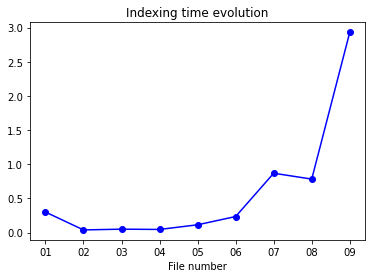

In [80]:
## Pour avoir une courbe avec le plot
plt.plot(x_axis,y_time, color='blue',marker='o',linestyle='solid')

#Titre
plt.title("Indexing time evolution")

# label
plt.xlabel("File number")
plt.show()